In [66]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import matplotlib.ticker as tkr
import re

pd.options.display.float_format = '{:,.2f}'.format

In [67]:
## Input/Output
DATA_FOLDER = "C:\\Users\\E2884\\Desktop\\WPy64-3980\\notebooks\\data\\OPENDATANC\\"
FILE = "OPENDATANC_fruits_et_legumes_regroupement_1.csv"
FILE2 = "OPENDATANC_fruits_et_legumes_regroupement_2.csv"

# Bulletin mensuel des fruits et légumes
## Regroupement 1 - Colonnes :
- enquête producteur (kg)
- enquête marché de gros (kg)
- valeur marché de gros (XPF)
- valeur moyenne marché de gros (kg)
- besoin estimé du marché (T)
- quotas date début (date)
- quotas date fin (date)
- quotas contingent (T)
- quotas réalisé (T)

## Regroupement 2 - Colonnes :
- enquête producteur (kg)
- enquête marché de gros (kg)
- valeur marché de gros (XPF)
- valeur moyenne marché de gros (kg)
- indice_isee
- indice_mg
- quotas date début (date)
- quotas date fin (date)
- quotas contingent (T)
- quotas réalisé (T)

In [68]:
df_raw_r1 = pd.read_csv(DATA_FOLDER + FILE)
df_raw_r2 = pd.read_csv(DATA_FOLDER + FILE2)
# print(df_raw_r1.head())
# print(df_raw_r2.head())

In [69]:
df_net_r1 = df_raw_r1.rename(columns={'annee': 'ANNEE', 
                                'mois': 'MOIS',
                                'regroupement1':'DESIGNATIONS',
                                'regroupement2':'TYPE',
                                'poids_enquete_kg':'PRODUCTEURS_KG',
                                'poids_mg_kg':'MG_KG',
                                'valeur_tot_mg_fr':'MG_XPF',
                                'valeur_moy':'MOYENNE_MG_XPF',
                                'besoin_marche_t':'BESOIN_T',
                                'quotas_date_debut':'QUOTAS_DATE_DEBUT',
                                'quotas_date_fin':'QUOTAS_DATE_FIN',
                                'quotas_contingent_t':'QUOTAS_CONTINGENT_T',
                                'quotas_realise_t':'QUOTAS_REALISE_T'
                               })

df_net_r2 = df_raw_r2.rename(columns={'annee': 'ANNEE', 
                                'mois': 'MOIS',
                                'regroupement2':'TYPE',
                                'poids_enquete_kg':'PRODUCTEURS_KG',
                                'poids_mg_kg':'MG_KG',
                                'valeur_tot_mg_fr':'MG_XPF',
                                'valeur_moy':'MOYENNE_MG_XPF',
                                'indice_isee':'INDICE_ISEE',
                                'indice_mg':'INDICE_MG',
                                'quotas_date_debut':'QUOTAS_DATE_DEBUT',
                                'quotas_date_fin':'QUOTAS_DATE_FIN',
                                'quotas_contingent_t':'QUOTAS_CONTINGENT_T',
                                'quotas_realise_t':'QUOTAS_REALISE_T'
                               })

df_net_r1['QUOTAS_DATE_DEBUT'] = pd.to_datetime(df_net_r1['QUOTAS_DATE_DEBUT'])
df_net_r1['QUOTAS_DATE_FIN'] = pd.to_datetime(df_net_r1['QUOTAS_DATE_FIN'])
df_net_r2['QUOTAS_DATE_DEBUT'] = pd.to_datetime(df_net_r2['QUOTAS_DATE_DEBUT'])
df_net_r2['QUOTAS_DATE_FIN'] = pd.to_datetime(df_net_r1['QUOTAS_DATE_FIN'])


df_net_r1['PRODUCTEURS_T'] = df_net_r1['PRODUCTEURS_KG']/1000
df_net_r1['MG_T'] = df_net_r1['MG_KG']/1000
df_net_r2['PRODUCTEURS_T'] = df_net_r2['PRODUCTEURS_KG']/1000
df_net_r2['MG_T'] = df_net_r2['MG_KG']/1000


print(df_net_r1)
print(df_net_r2)

      ANNEE  MOIS            DESIGNATIONS                         TYPE  \
0      2018     1          PATATES DOUCES                TOTAL LEGUMES   
1      2018     2          PATATES DOUCES                TOTAL LEGUMES   
2      2018    10          PATATES DOUCES                TOTAL LEGUMES   
3      2018     3          PATATES DOUCES                TOTAL LEGUMES   
4      2018     7          PATATES DOUCES                TOTAL LEGUMES   
...     ...   ...                     ...                          ...   
5157   2019    11  HARICOT VERT ET BEURRE                TOTAL LEGUMES   
5158   2019     6  HARICOT VERT ET BEURRE                TOTAL LEGUMES   
5159   2019     7  HARICOT VERT ET BEURRE                TOTAL LEGUMES   
5160   2019     3  HARICOT VERT ET BEURRE                TOTAL LEGUMES   
5161   2019     5  PAMPLEMOUSSE ET POMELO  TOTAL FRUITS (HORS VANILLE)   

      PRODUCTEURS_KG     MG_KG       MG_XPF  MOYENNE_MG_XPF  BESOIN_T  \
0          21,062.00 13,882.00 5,514,0

## Idée de tableaux/graphique
### Regroupement 2 : evolution annuelle des qté totales fruits et legumes et prix moyen au kg de 2012 à 2023


In [70]:
df_net_r2_fruit = df_net_r2[df_net_r2["TYPE"]=="TOTAL FRUITS (HORS VANILLE)"]
df_net_r2_legume = df_net_r2[df_net_r2["TYPE"]=="TOTAL LEGUMES"]

df_r2_gb_fruit = df_net_r2_fruit.groupby(['ANNEE']).agg({'PRODUCTEURS_T':'sum','MG_T':'sum','MG_KG':'sum','MG_XPF':'sum','QUOTAS_CONTINGENT_T':'sum','QUOTAS_REALISE_T':'sum'})
df_r2_gb_fruit['MOYENNE_MG_XPF']=df_r2_gb_fruit['MG_XPF']/df_r2_gb_fruit['MG_KG']

df_r2_gb_legume = df_net_r2_legume.groupby(['ANNEE']).agg({'PRODUCTEURS_T':'sum','MG_T':'sum','MG_KG':'sum','MG_XPF':'sum','QUOTAS_CONTINGENT_T':'sum','QUOTAS_REALISE_T':'sum'})
df_r2_gb_legume['MOYENNE_MG_XPF']=df_r2_gb_legume['MG_XPF']/df_r2_gb_legume['MG_KG']

print(df_r2_gb_legume)



       PRODUCTEURS_T     MG_T        MG_KG           MG_XPF  \
ANNEE                                                         
2012        6,909.01 4,196.46 4,196,459.58 1,093,916,953.95   
2013        7,873.91 4,084.62 4,084,617.43 1,232,102,283.02   
2014        8,462.97 4,177.48 4,177,476.00 1,204,208,782.00   
2015        8,550.63 3,723.60 3,723,600.10 1,041,783,615.00   
2016        8,930.66 3,561.71 3,561,705.20 1,059,967,687.00   
2017        8,720.83 3,582.40 3,582,400.85 1,128,042,362.00   
2018        9,612.23 2,176.00 2,176,004.65   729,917,007.00   
2019        9,751.27 2,002.00 2,002,003.50   646,779,040.50   
2020        9,309.81 2,209.70 2,209,700.77   744,039,645.25   
2021        7,125.48 2,598.14 2,598,143.56   979,821,592.00   
2022        5,683.53 1,680.63 1,680,630.93   781,151,891.00   
2023        2,561.10   852.62   852,620.88   415,678,025.00   

       QUOTAS_CONTINGENT_T  QUOTAS_REALISE_T  MOYENNE_MG_XPF  
ANNEE                                                 

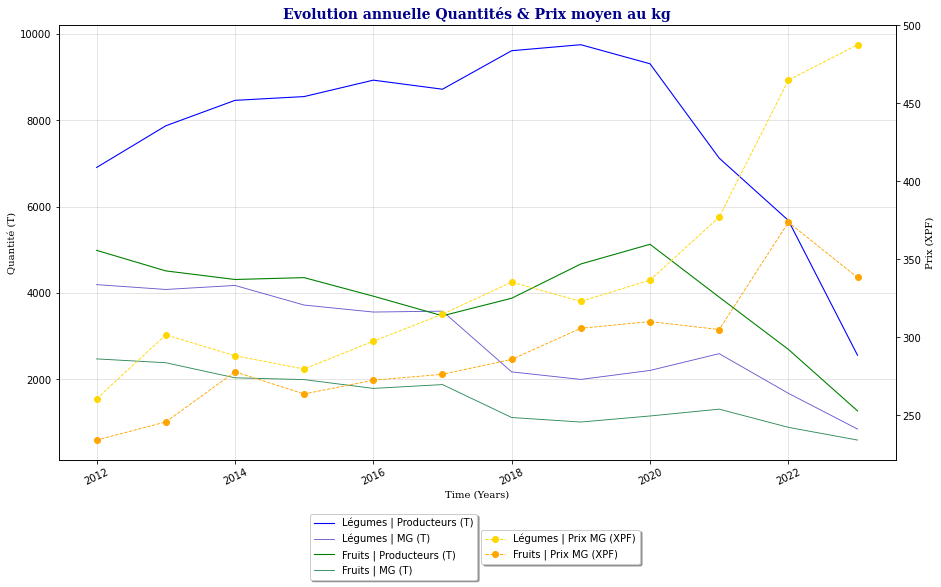

In [71]:
## GRAPHIQUE 
TITLE = "Evolution annuelle Quantités & Prix moyen au kg"

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8)) # Nombre et disposition des zones de dessin

# Format date xaxis
plt.xticks(rotation=25)

# Axe 1
axes.set_title(TITLE, fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 14})
axes.set_xlabel("Time (Years)", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axes.set_ylabel("Quantité (T)", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axes.plot(df_r2_gb_legume.index.values,df_r2_gb_legume.PRODUCTEURS_T,'blue',linewidth=1.1,label="Légumes | Producteurs (T)")
axes.plot(df_r2_gb_legume.index.values,df_r2_gb_legume.MG_T,'slateblue',linewidth=.9,label="Légumes | MG (T)")
axes.plot(df_r2_gb_fruit.index.values,df_r2_gb_fruit.PRODUCTEURS_T,'green',linewidth=1.1,label="Fruits | Producteurs (T)")
axes.plot(df_r2_gb_fruit.index.values,df_r2_gb_fruit.MG_T,'seagreen',linewidth=.9,label="Fruits | MG (T)")
axes.legend(loc="center",bbox_to_anchor=(0,0,0.8,-0.4), ncol=1, fancybox=True, shadow=True)
# axes.set_ylim(34.2,34.6)

# Axe 2
axe2 = axes.twinx()
axe2.set_ylabel("Prix (XPF)", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axe2.plot(df_r2_gb_legume.index.values,df_r2_gb_legume.MOYENNE_MG_XPF,'gold',linestyle='--', marker='o',linewidth=.9,label="Légumes | Prix MG (XPF)")
axe2.plot(df_r2_gb_fruit.index.values,df_r2_gb_fruit.MOYENNE_MG_XPF,'orange',linestyle='--', marker='o',linewidth=.9,label="Fruits | Prix MG (XPF)")
axe2.legend(loc="center",bbox_to_anchor=(0,0,1.2,-0.4), ncol=1, fancybox=True, shadow=True)
# axe2.set_ylim(34.2,34.6)

# Option grille
axes.grid(True,alpha=0.4)

### Regroupement 2 : sur la période 2012 à 2023 évolution mensuelle des quantités & prix moyen

In [72]:
df_r2_gb_fruit_m = df_net_r2_fruit.groupby(['MOIS']).agg({'PRODUCTEURS_T':'sum','MG_T':'sum','MG_KG':'sum','MG_XPF':'sum','QUOTAS_CONTINGENT_T':'sum','QUOTAS_REALISE_T':'sum'})
df_r2_gb_fruit_m['MOYENNE_MG_XPF']=df_r2_gb_fruit_m['MG_XPF']/df_r2_gb_fruit_m['MG_KG']

df_r2_gb_legume_m = df_net_r2_legume.groupby(['MOIS']).agg({'PRODUCTEURS_T':'sum','MG_T':'sum','MG_KG':'sum','MG_XPF':'sum','QUOTAS_CONTINGENT_T':'sum','QUOTAS_REALISE_T':'sum'})
df_r2_gb_legume_m['MOYENNE_MG_XPF']=df_r2_gb_legume_m['MG_XPF']/df_r2_gb_legume_m['MG_KG']

print(df_r2_gb_legume_m)


      PRODUCTEURS_T     MG_T        MG_KG           MG_XPF  \
MOIS                                                         
1          6,352.73 3,232.69 3,232,690.35 1,067,584,367.00   
2          4,495.23 1,743.63 1,743,626.01   659,970,730.54   
3          4,911.01 1,930.38 1,930,381.23   800,094,139.53   
4          5,186.56 1,971.56 1,971,556.81   783,351,732.05   
5          6,041.77 1,898.80 1,898,800.82   727,843,393.10   
6          7,230.88 2,463.19 2,463,190.36   884,289,771.18   
7          8,950.27 2,993.42 2,993,417.42 1,009,781,861.99   
8         10,233.08 3,327.89 3,327,892.36 1,005,738,850.36   
9         10,718.41 3,988.10 3,988,095.20 1,084,329,564.98   
10        11,225.10 4,340.57 4,340,568.17 1,063,437,210.00   
11         9,880.34 3,707.92 3,707,922.90   985,319,974.00   
12         8,266.03 3,247.22 3,247,221.83   985,667,289.00   

      QUOTAS_CONTINGENT_T  QUOTAS_REALISE_T  MOYENNE_MG_XPF  
MOIS                                                         
1      

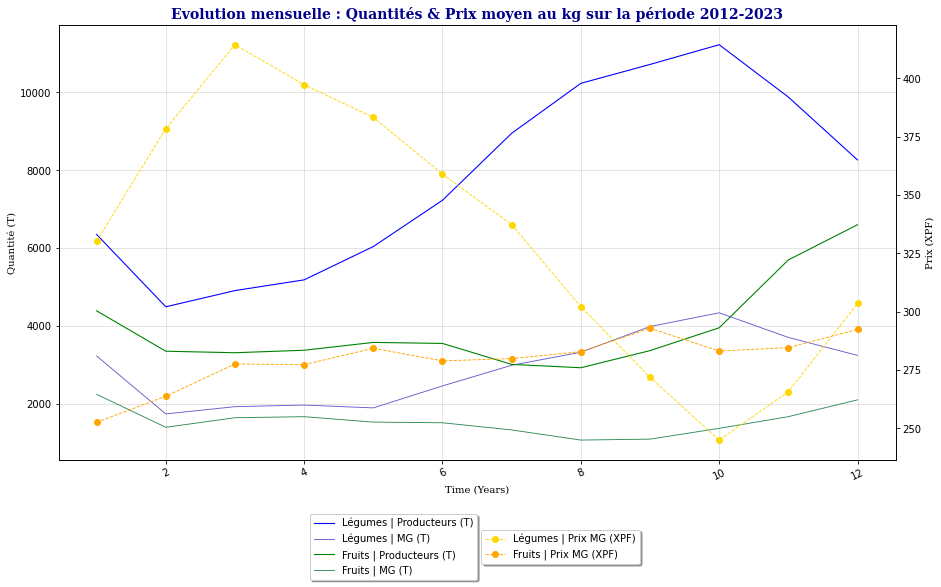

In [73]:
## GRAPHIQUE 
TITLE = "Evolution mensuelle : Quantités & Prix moyen au kg sur la période 2012-2023"

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8)) # Nombre et disposition des zones de dessin

# Format date xaxis
plt.xticks(rotation=25)

# Axe 1
axes.set_title(TITLE, fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 14})
axes.set_xlabel("Time (Years)", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axes.set_ylabel("Quantité (T)", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axes.plot(df_r2_gb_legume_m.index.values,df_r2_gb_legume_m.PRODUCTEURS_T,'blue',linewidth=1.1,label="Légumes | Producteurs (T)")
axes.plot(df_r2_gb_legume_m.index.values,df_r2_gb_legume_m.MG_T,'slateblue',linewidth=.9,label="Légumes | MG (T)")
axes.plot(df_r2_gb_fruit_m.index.values,df_r2_gb_fruit_m.PRODUCTEURS_T,'green',linewidth=1.1,label="Fruits | Producteurs (T)")
axes.plot(df_r2_gb_fruit_m.index.values,df_r2_gb_fruit_m.MG_T,'seagreen',linewidth=.9,label="Fruits | MG (T)")
axes.legend(loc="center",bbox_to_anchor=(0,0,0.8,-0.4), ncol=1, fancybox=True, shadow=True)
# axes.set_ylim(34.2,34.6)

# Axe 2
axe2 = axes.twinx()
axe2.set_ylabel("Prix (XPF)", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axe2.plot(df_r2_gb_legume_m.index.values,df_r2_gb_legume_m.MOYENNE_MG_XPF,'gold',linestyle='--', marker='o',linewidth=.9,label="Légumes | Prix MG (XPF)")
axe2.plot(df_r2_gb_fruit_m.index.values,df_r2_gb_fruit_m.MOYENNE_MG_XPF,'orange',linestyle='--', marker='o',linewidth=.9,label="Fruits | Prix MG (XPF)")
axe2.legend(loc="center",bbox_to_anchor=(0,0,1.2,-0.4), ncol=1, fancybox=True, shadow=True)
# axe2.set_ylim(34.2,34.6)

# Option grille
axes.grid(True,alpha=0.4)

### Regroupement 1 : Heat Map sur qté total prod + MG

In [74]:
df_net_r1['PROD_MG_T']=df_net_r1['PRODUCTEURS_T']+df_net_r1['MG_T']
df_net_r1_fruit = df_net_r1[df_net_r1["TYPE"]=="TOTAL FRUITS (HORS VANILLE)"]
df_net_r1_legume = df_net_r1[df_net_r1["TYPE"]=="TOTAL LEGUMES"]


df_r1_gb_fruit_xpf_y = df_net_r1_fruit.groupby(['DESIGNATIONS','ANNEE']).agg({'PROD_MG_T':'sum'})
df_r1_gb_fruit_xpf_y_pivot = df_r1_gb_fruit_xpf_y.pivot_table(columns='DESIGNATIONS', index='ANNEE', values='PROD_MG_T')
df_r1_gb_fruit_xpf_y_pivot = df_r1_gb_fruit_xpf_y_pivot[df_r1_gb_fruit_xpf_y_pivot.sum().sort_values(ascending=False).index]

df_r1_gb_legume_xpf_y = df_net_r1_legume.groupby(['DESIGNATIONS','ANNEE']).agg({'PROD_MG_T':'sum'})
df_r1_gb_legume_xpf_y_pivot = df_r1_gb_legume_xpf_y.pivot_table(columns='DESIGNATIONS', index='ANNEE', values='PROD_MG_T')
df_r1_gb_legume_xpf_y_pivot = df_r1_gb_legume_xpf_y_pivot[df_r1_gb_legume_xpf_y_pivot.sum().sort_values(ascending=False).index]


[Text(0, 0.5, '2012'),
 Text(0, 1.5, '2013'),
 Text(0, 2.5, '2014'),
 Text(0, 3.5, '2015'),
 Text(0, 4.5, '2016'),
 Text(0, 5.5, '2017'),
 Text(0, 6.5, '2018'),
 Text(0, 7.5, '2019'),
 Text(0, 8.5, '2020'),
 Text(0, 9.5, '2021'),
 Text(0, 10.5, '2022'),
 Text(0, 11.5, '2023')]

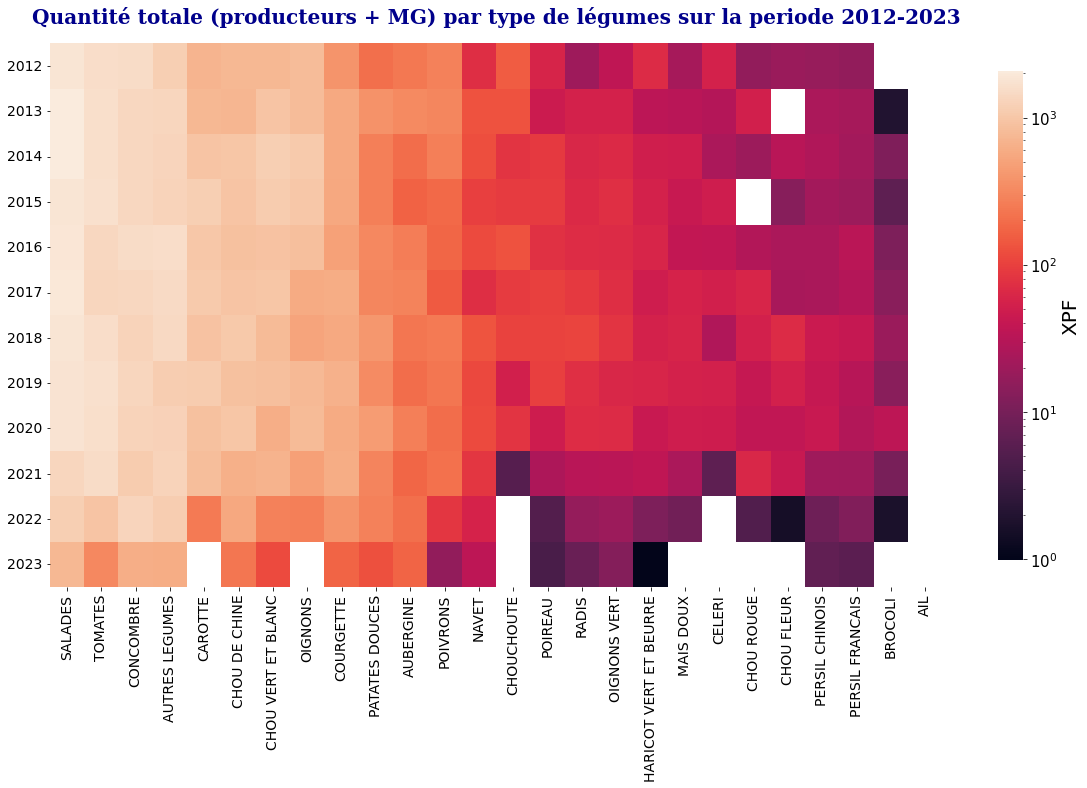

In [75]:
## GRAPHIQUE - heatmap legume
TITLE = "Quantité totale (producteurs + MG) par type de légumes sur la periode 2012-2023"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) # Nombre et disposition des zones de dessin

ax.set_title(TITLE, fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 20},pad=20)
ax = sns.heatmap(df_r1_gb_legume_xpf_y_pivot, square=False,norm=LogNorm(), cbar_kws={'label': 'M XPF', 'location' : 'right',"shrink": 0.9})
ax.set(xlabel="", ylabel="")
ax.figure.axes[-1].set_ylabel('XPF', size=20)
ax.figure.axes[-1].tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)


[Text(0, 0.5, '2012'),
 Text(0, 1.5, '2013'),
 Text(0, 2.5, '2014'),
 Text(0, 3.5, '2015'),
 Text(0, 4.5, '2016'),
 Text(0, 5.5, '2017'),
 Text(0, 6.5, '2018'),
 Text(0, 7.5, '2019'),
 Text(0, 8.5, '2020'),
 Text(0, 9.5, '2021'),
 Text(0, 10.5, '2022'),
 Text(0, 11.5, '2023')]

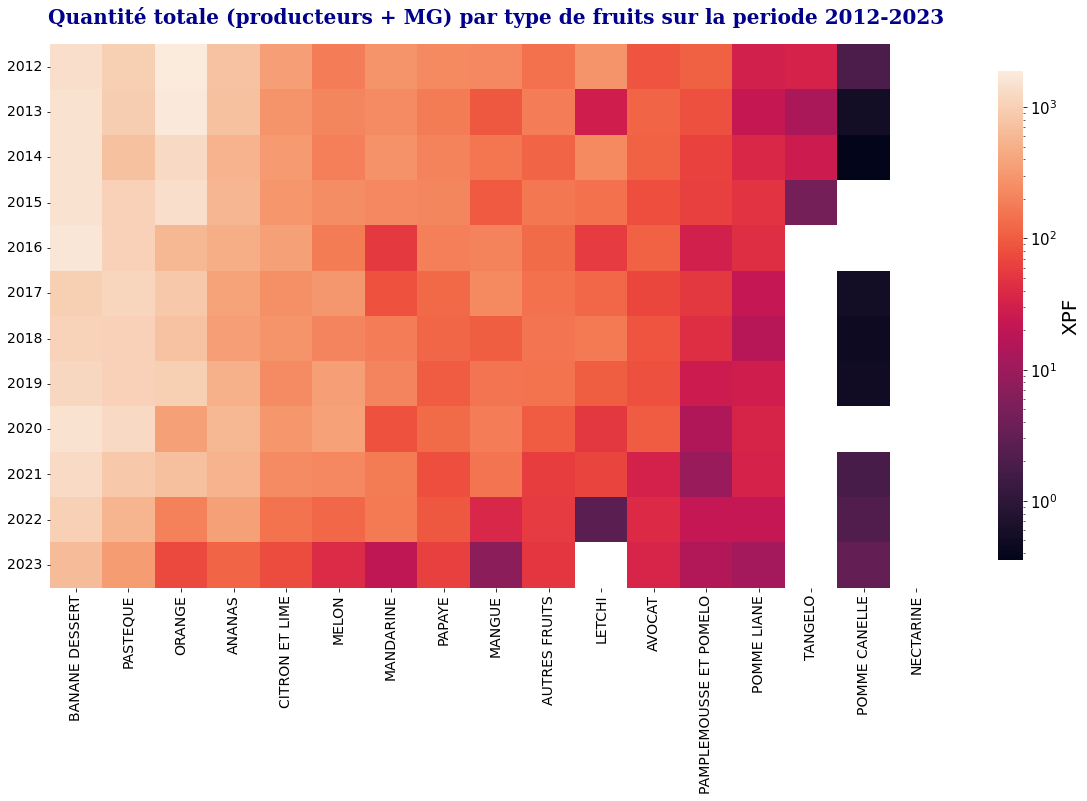

In [76]:
## GRAPHIQUE - heatmap fruit
TITLE = "Quantité totale (producteurs + MG) par type de fruits sur la periode 2012-2023"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) # Nombre et disposition des zones de dessin

ax.set_title(TITLE, fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 20},pad=20)
ax = sns.heatmap(df_r1_gb_fruit_xpf_y_pivot, square=False,norm=LogNorm(), cbar_kws={'label': 'M XPF', 'location' : 'right',"shrink": 0.9})
ax.set(xlabel="", ylabel="")
ax.figure.axes[-1].set_ylabel('XPF', size=20)
ax.figure.axes[-1].tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)

### Regroupement 1 : Heat Map variation sur prix au kg

In [77]:
df_net_r1['PROD_MG_T']=df_net_r1['PRODUCTEURS_T']+df_net_r1['MG_T']
df_net_r1_fruit = df_net_r1[df_net_r1["TYPE"]=="TOTAL FRUITS (HORS VANILLE)"]
df_net_r1_legume = df_net_r1[df_net_r1["TYPE"]=="TOTAL LEGUMES"]
# df_net_r1_legume = df_net_r1_legume[df_net_r1_legume['DESIGNATIONS'] != 'AUTRES LEGUMES']


df_r1_gb_fruit_xpf_y = df_net_r1_fruit.groupby(['DESIGNATIONS','ANNEE']).agg({'MG_KG':'sum','MG_XPF':'sum'})
df_r1_gb_fruit_xpf_y['PRIX_KG']=df_r1_gb_fruit_xpf_y['MG_XPF']/df_r1_gb_fruit_xpf_y['MG_KG']
df_r1_gb_fruit_xpf_y_pivot = df_r1_gb_fruit_xpf_y.pivot_table(columns='DESIGNATIONS', index='ANNEE', values='PRIX_KG')
df_r1_gb_fruit_xpf_y_pivot = df_r1_gb_fruit_xpf_y_pivot[df_r1_gb_fruit_xpf_y_pivot.sum().sort_values(ascending=False).index]
df_r1_gb_fruit_xpf_y_pivot = df_r1_gb_fruit_xpf_y_pivot.iloc[:, :].apply(lambda x: (x-x.mean())*100 / x.mean())

df_r1_gb_legume_xpf_y = df_net_r1_legume.groupby(['DESIGNATIONS','ANNEE']).agg({'MG_KG':'sum','MG_XPF':'sum'})
df_r1_gb_legume_xpf_y['PRIX_KG']=df_r1_gb_legume_xpf_y['MG_XPF']/df_r1_gb_legume_xpf_y['MG_KG']
df_r1_gb_legume_xpf_y_pivot = df_r1_gb_legume_xpf_y.pivot_table(columns='DESIGNATIONS', index='ANNEE', values='PRIX_KG')
df_r1_gb_legume_xpf_y_pivot = df_r1_gb_legume_xpf_y_pivot[df_r1_gb_legume_xpf_y_pivot.sum().sort_values(ascending=False).index]
df_r1_gb_legume_xpf_y_pivot = df_r1_gb_legume_xpf_y_pivot.iloc[:, :].apply(lambda x: (x-x.mean())*100 / x.mean())

[Text(0, 0.5, '2012'),
 Text(0, 1.5, '2013'),
 Text(0, 2.5, '2014'),
 Text(0, 3.5, '2015'),
 Text(0, 4.5, '2016'),
 Text(0, 5.5, '2017'),
 Text(0, 6.5, '2018'),
 Text(0, 7.5, '2019'),
 Text(0, 8.5, '2020'),
 Text(0, 9.5, '2021'),
 Text(0, 10.5, '2022'),
 Text(0, 11.5, '2023')]

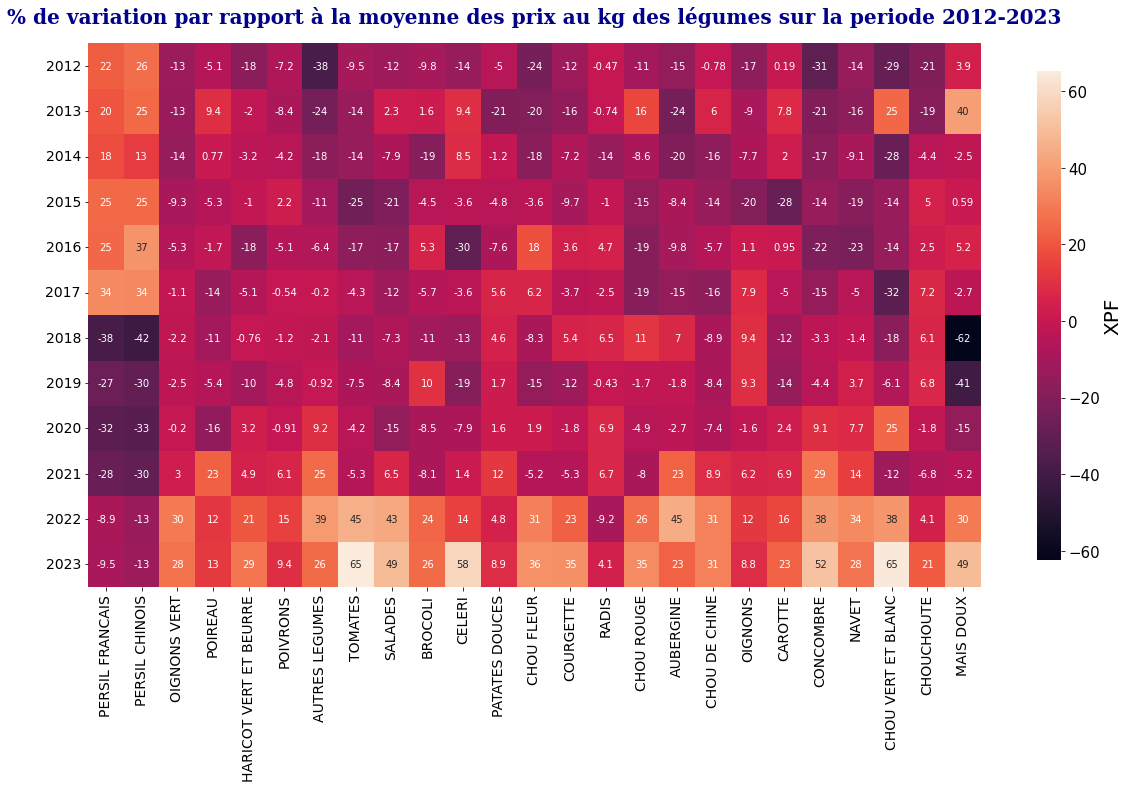

In [78]:
## GRAPHIQUE - heatmap legume
TITLE = "% de variation par rapport à la moyenne des prix au kg des légumes sur la periode 2012-2023"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) # Nombre et disposition des zones de dessin

ax.set_title(TITLE, fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 20},pad=20)
ax = sns.heatmap(df_r1_gb_legume_xpf_y_pivot, annot=True, square=False, cbar_kws={'label': 'M XPF', 'location' : 'right',"shrink": 0.9})
ax.set(xlabel="", ylabel="")
ax.figure.axes[-1].set_ylabel('XPF', size=20)
ax.figure.axes[-1].tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)

[Text(0, 0.5, '2012'),
 Text(0, 1.5, '2013'),
 Text(0, 2.5, '2014'),
 Text(0, 3.5, '2015'),
 Text(0, 4.5, '2016'),
 Text(0, 5.5, '2017'),
 Text(0, 6.5, '2018'),
 Text(0, 7.5, '2019'),
 Text(0, 8.5, '2020'),
 Text(0, 9.5, '2021'),
 Text(0, 10.5, '2022'),
 Text(0, 11.5, '2023')]

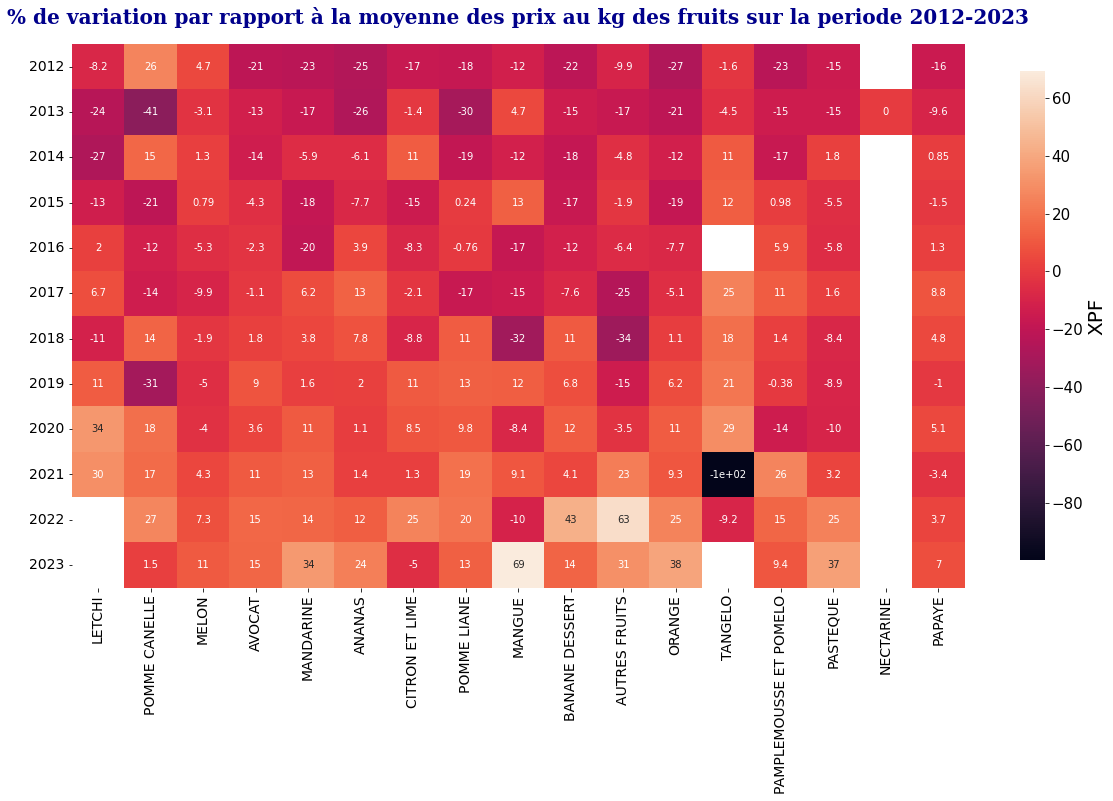

In [79]:
## GRAPHIQUE - heatmap legume
TITLE = "% de variation par rapport à la moyenne des prix au kg des fruits sur la periode 2012-2023"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) # Nombre et disposition des zones de dessin

ax.set_title(TITLE, fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 20},pad=20)
ax = sns.heatmap(df_r1_gb_fruit_xpf_y_pivot, annot=True, square=False, cbar_kws={'label': 'M XPF', 'location' : 'right',"shrink": 0.9})
ax.set(xlabel="", ylabel="")
ax.figure.axes[-1].set_ylabel('XPF', size=20)
ax.figure.axes[-1].tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)

### Regroupement 1 : Heat Map qté import

In [80]:
df_net_r1_fruit = df_net_r1[df_net_r1["TYPE"]=="TOTAL FRUITS (HORS VANILLE)"]
df_net_r1_legume = df_net_r1[df_net_r1["TYPE"]=="TOTAL LEGUMES"]


df_r1_gb_fruit_xpf_y = df_net_r1_fruit.groupby(['DESIGNATIONS','ANNEE']).agg({'QUOTAS_REALISE_T':'sum'})
df_r1_gb_fruit_xpf_y_pivot = df_r1_gb_fruit_xpf_y.pivot_table(columns='DESIGNATIONS', index='ANNEE', values='QUOTAS_REALISE_T')
df_r1_gb_fruit_xpf_y_pivot = df_r1_gb_fruit_xpf_y_pivot[df_r1_gb_fruit_xpf_y_pivot.sum().sort_values(ascending=False).index]

df_r1_gb_legume_xpf_y = df_net_r1_legume.groupby(['DESIGNATIONS','ANNEE']).agg({'QUOTAS_REALISE_T':'sum'})
df_r1_gb_legume_xpf_y_pivot = df_r1_gb_legume_xpf_y.pivot_table(columns='DESIGNATIONS', index='ANNEE', values='QUOTAS_REALISE_T')
df_r1_gb_legume_xpf_y_pivot = df_r1_gb_legume_xpf_y_pivot[df_r1_gb_legume_xpf_y_pivot.sum().sort_values(ascending=False).index]

[Text(0, 0.5, '2012'),
 Text(0, 1.5, '2013'),
 Text(0, 2.5, '2014'),
 Text(0, 3.5, '2015'),
 Text(0, 4.5, '2016'),
 Text(0, 5.5, '2017'),
 Text(0, 6.5, '2018'),
 Text(0, 7.5, '2019'),
 Text(0, 8.5, '2020'),
 Text(0, 9.5, '2021'),
 Text(0, 10.5, '2022'),
 Text(0, 11.5, '2023')]

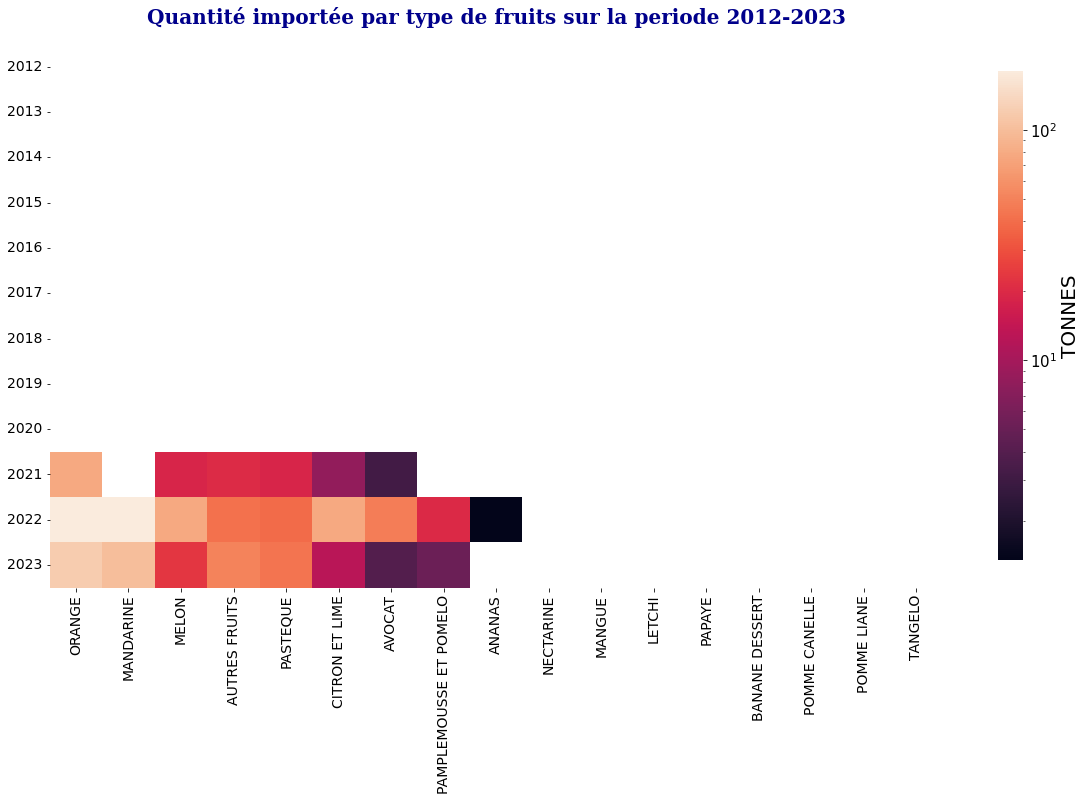

In [81]:
## GRAPHIQUE - heatmap fruit quotas
TITLE = "Quantité importée par type de fruits sur la periode 2012-2023"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) # Nombre et disposition des zones de dessin

ax.set_title(TITLE, fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 20},pad=20)
ax = sns.heatmap(df_r1_gb_fruit_xpf_y_pivot, square=False,norm=LogNorm(), cbar_kws={'label': 'TONNES', 'location' : 'right',"shrink": 0.9})
ax.set(xlabel="", ylabel="")
ax.figure.axes[-1].set_ylabel('TONNES', size=20)
ax.figure.axes[-1].tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)

[Text(0, 0.5, '2012'),
 Text(0, 1.5, '2013'),
 Text(0, 2.5, '2014'),
 Text(0, 3.5, '2015'),
 Text(0, 4.5, '2016'),
 Text(0, 5.5, '2017'),
 Text(0, 6.5, '2018'),
 Text(0, 7.5, '2019'),
 Text(0, 8.5, '2020'),
 Text(0, 9.5, '2021'),
 Text(0, 10.5, '2022'),
 Text(0, 11.5, '2023')]

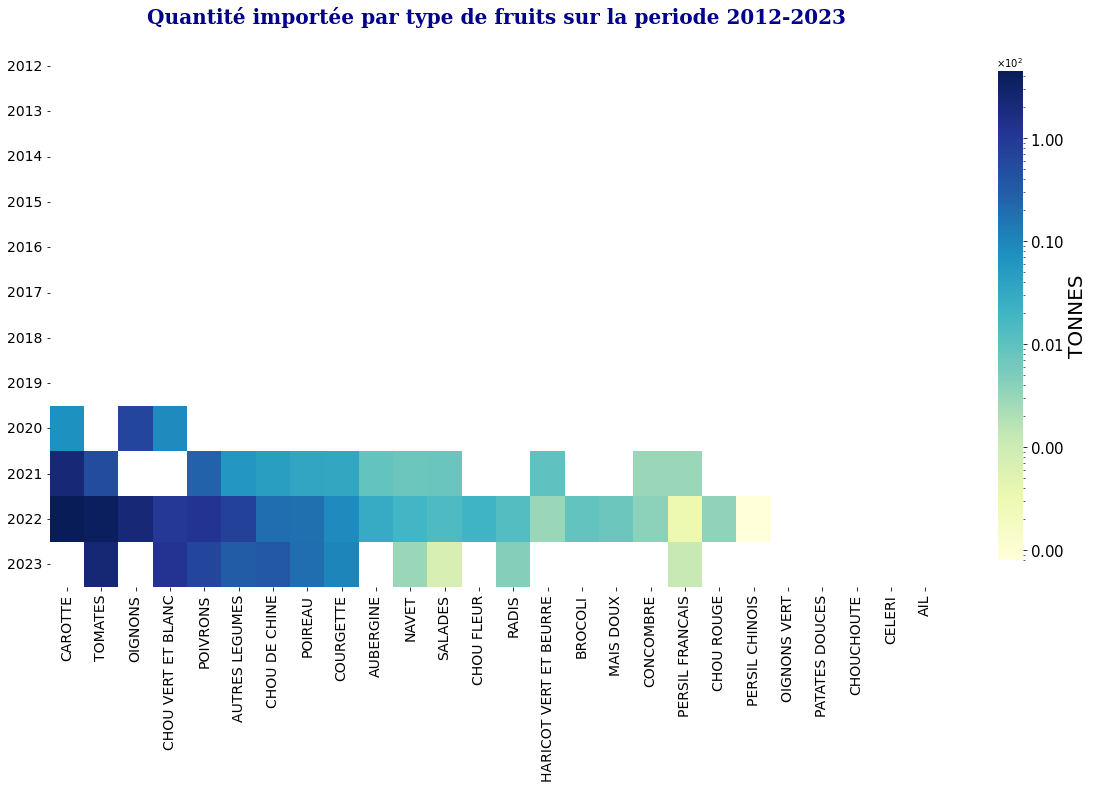

In [93]:
## GRAPHIQUE - heatmap legume quotas
TITLE = "Quantité importée par type de fruits sur la periode 2012-2023"

formatter = tkr.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) # Nombre et disposition des zones de dessin

ax.set_title(TITLE, fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 20},pad=20)
ax = sns.heatmap(df_r1_gb_legume_xpf_y_pivot, square=False,norm=LogNorm(), cbar_kws={'label': 'TONNES', 'location' : 'right',"shrink": 0.9,"format": formatter},cmap="YlGnBu")
ax.set(xlabel="", ylabel="")
ax.figure.axes[-1].set_ylabel('TONNES', size=20)
ax.figure.axes[-1].tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)

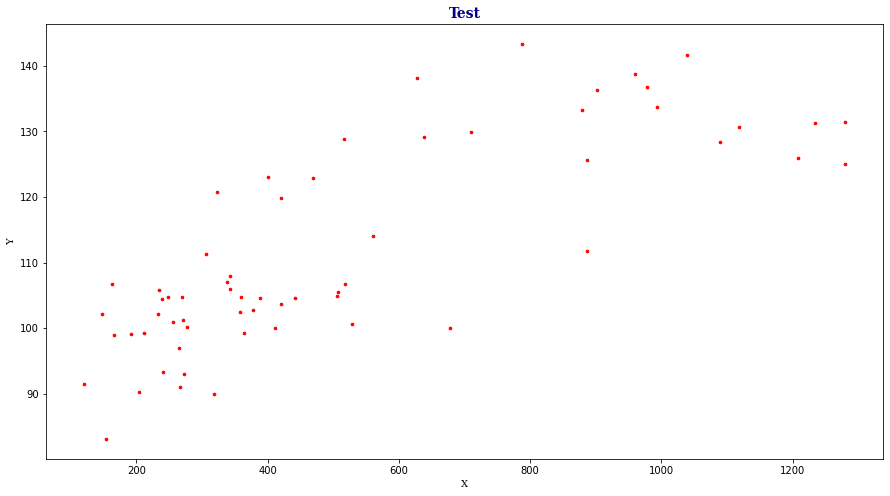

In [102]:
## GRAPHIQUE - Rendement vs Puissance
TITLE = "Test" # Titre de la figure


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8)) # Nombre et disposition des zones de dessin


# Axe 1
axes.set_title(TITLE, fontdict={'family': 'serif','color' : 'darkblue','weight': 'bold','size': 14})
axes.set_xlabel("X", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axes.set_ylabel("Y", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
# axes.scatter(df_net_r2.PRODUCTEURS_KG, df_net_r2.INDICE_ISEE,7,color='blue', marker='o',alpha=0.3,label="")
# axes.scatter(df_net_r2.MG_KG, df_net_r2.INDICE_ISEE,7,color='green', marker='o',alpha=0.3,label="")
axes.scatter(df_net_r2.QUOTAS_CONTINGENT_T, df_net_r2.INDICE_ISEE,7,color='red', marker='o',alpha=1,label="")